In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


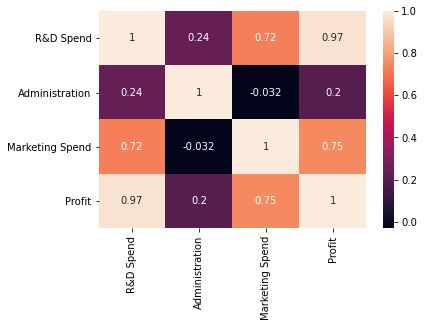

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
dataset_dummies = pd.get_dummies(df['State'],drop_first=True)
dataset_dummies.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [10]:
temp_3 = pd.concat([dataset_dummies,df], axis = 1)
temp_3.drop(['State','Administration', 'Florida','New York','Marketing Spend'],axis=1,inplace =True)

In [11]:
temp_3.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [12]:
X = temp_3.iloc[:, :-1].values
y = temp_3.iloc[:, -1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
regressor.intercept_

47302.43993374131

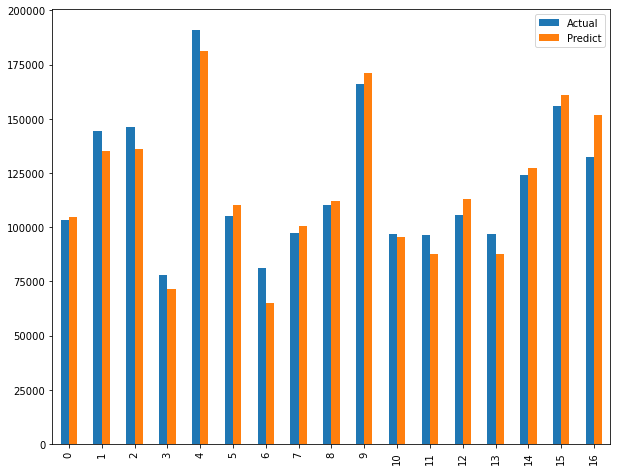

In [17]:
temp_4 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
temp_4.plot(kind='bar',figsize=(10,8))
plt.show()

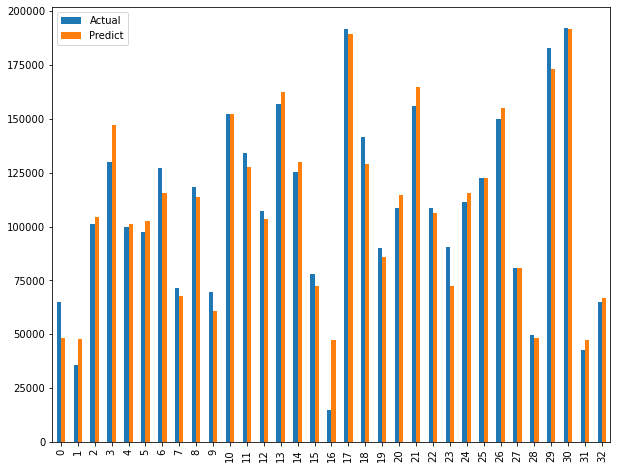

In [18]:
temp_4 = pd.DataFrame({'Actual':y_train,'Predict':regressor.predict(X_train)})
temp_4.plot(kind='bar',figsize=(10,8))
plt.show()

In [19]:
mse = 1/len(X_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(X_test) * np.sum(np.abs(y_pred - y_test))
print('mse :{}'.format(mse))
print('mae :{}'.format(mae))

mse :75085549.76169327
mae :7176.432276949292


In [20]:
import statsmodels.api as sm
from scipy import stats

In [21]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           3.50e-32
Time:                        03:06:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [22]:
X = temp_3.iloc[:, :-1].values
y = temp_3.iloc[:, -1].values